In [1]:
##Kaggle functionality for loading data; Note that you have to use your kaggle API token (see the link above):
# !pip install opendatasets
# !pip install -q kaggle
# !pip install --upgrade --force-reinstall --no-deps kaggle
# !mkdir ~/.kaggle
# !ls ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
# !kaggle competitions download -c paddy-disease-classification

# #Unpack data:
# !mkdir paddy-disease
# !unzip paddy-disease-classification.zip -d paddy-disease

# #Install LightAutoML, Pandas and torch EfficientNet:
# !pip install -U lightautoml[cv] #[cv] is for installing CV tasks functionality

In [2]:
# Standard python libraries
import os
import time

# Essential DS libraries
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import torch
import seaborn as sns
import matplotlib.pyplot as plt

# LightAutoML presets, task and report generation
from lightautoml.automl.presets.image_presets import TabularCVAutoML
from lightautoml.tasks import Task

In [3]:
import sys
sys.version

'3.9.18 (main, Sep 11 2023, 13:41:44) \n[GCC 11.2.0]'

In [4]:
np.random.seed(42)
torch.set_num_threads(2)

In [5]:
INPUT_DIR = "/home/vorkov/Workspace/Python/CV-Project/dataset/coco_dataset_lama/"

In [6]:
train_data = pd.read_csv("/home/vorkov/Workspace/Python/CV-Project/dataset/coco_dataset_lama/data_unique.csv")
print(train_data.shape)
train_data.head()

(8635, 2)


,label,image_id
0,bear,000000568082.jpg
1,bear,000000224878.jpg
2,horse,000000489983.jpg
3,horse,000000265831.jpg
4,elephant,000000324816.jpg


In [7]:
submission = pd.read_csv("/home/vorkov/Workspace/Python/CV-Project/dataset/coco_dataset_lama/data_test_unique.csv")
print(submission.shape)
submission.head()

(388, 2)


,label,image_id
0,zebra,000000068933.jpg
1,elephant,000000170739.jpg
2,giraffe,000000104619.jpg
3,horse,000000029187.jpg
4,bear,000000132622.jpg


In [8]:
%%time

train_data['path'] = INPUT_DIR + 'train_images/' + train_data['label'] + '/' + train_data['image_id']
train_data.head()

CPU times: user 3.98 ms, sys: 0 ns, total: 3.98 ms
Wall time: 3.95 ms


,label,image_id,path
0,bear,000000568082.jpg,/home/vorkov/Workspace/Python/CV-Project/datas...
1,bear,000000224878.jpg,/home/vorkov/Workspace/Python/CV-Project/datas...
2,horse,000000489983.jpg,/home/vorkov/Workspace/Python/CV-Project/datas...
3,horse,000000265831.jpg,/home/vorkov/Workspace/Python/CV-Project/datas...
4,elephant,000000324816.jpg,/home/vorkov/Workspace/Python/CV-Project/datas...


In [9]:
submission['path'] = INPUT_DIR + 'test_images/' + submission['label'] + '/' + submission['image_id']
submission.head()

,label,image_id,path
0,zebra,000000068933.jpg,/home/vorkov/Workspace/Python/CV-Project/datas...
1,elephant,000000170739.jpg,/home/vorkov/Workspace/Python/CV-Project/datas...
2,giraffe,000000104619.jpg,/home/vorkov/Workspace/Python/CV-Project/datas...
3,horse,000000029187.jpg,/home/vorkov/Workspace/Python/CV-Project/datas...
4,bear,000000132622.jpg,/home/vorkov/Workspace/Python/CV-Project/datas...


In [10]:
# os.mkdir('./paddy-disease/modified_train')

In [11]:
# from PIL import Image
# from tqdm.notebook import tqdm
# new_imgs = []
# 
# for i, p in tqdm(enumerate(train_data['path'].values)):
#     if i % 1000 == 0:
#         print(i)
# 
#     img = Image.open(p)
#     new_imgs.append([img, p.split('/')[-2], p.split('/')[-1]])

    # for it in range(10):
        # new_img = img.rotate(np.random.rand() * 60 - 30, resample=3)

        # if np.random.rand() > 0.5:
            # new_img = new_img.transpose(Image.FLIP_LEFT_RIGHT)

        # new_img_name = './paddy-disease/modified_train/' + p.split('/')[-1][:-4] + '_' + str(it) + '.jpg'
        # new_img.save(new_img_name)
        # new_imgs.append([new_img_name, p.split('/')[-2], p.split('/')[-1]])

In [12]:
# new_imgs

In [13]:
# train_data = pd.concat([train_data, pd.DataFrame(new_imgs, columns = ['path', 'label', 'image_id'])]).reset_index(drop = True)
train_data.head()

,label,image_id,path
0,bear,000000568082.jpg,/home/vorkov/Workspace/Python/CV-Project/datas...
1,bear,000000224878.jpg,/home/vorkov/Workspace/Python/CV-Project/datas...
2,horse,000000489983.jpg,/home/vorkov/Workspace/Python/CV-Project/datas...
3,horse,000000265831.jpg,/home/vorkov/Workspace/Python/CV-Project/datas...
4,elephant,000000324816.jpg,/home/vorkov/Workspace/Python/CV-Project/datas...


In [14]:
# os.mkdir('./paddy-disease/modified_test')

In [15]:
# new_imgs = []
# 
# for i, p in tqdm(enumerate(submission['path'].values)):
#     if i % 1000 == 0:
#         print(i)
# 
#     img = Image.open(p)
# 
#     for it in range(5):
#         new_img = img.rotate(np.random.rand() * 60 - 30, resample=3)
#         if np.random.rand() > 0.5:
#             new_img = new_img.transpose(Image.FLIP_LEFT_RIGHT)
# 
#         new_img_name = './paddy-disease/modified_test/' + p.split('/')[-1][:-4] + '_' + str(it) + '.jpg'
#         new_img.save(new_img_name)
#         new_imgs.append([new_img_name, p.split('/')[-1]])

In [16]:
# submission = pd.concat([submission, pd.DataFrame(new_imgs, columns = ['path', 'image_id'])]).reset_index(drop = True)
# submission

In [17]:
task = Task('multiclass')

In [18]:
roles = {
    'target': 'label',
    'path': ['path'],
    'group': 'image_id'
}

In [19]:
automl = TabularCVAutoML(task = task, timeout=1200, cpu_limit = 8, reader_params = {'cv': 5, 'random_state': 42})

In [20]:
train_data['path'][1]

'/home/vorkov/Workspace/Python/CV-Project/dataset/coco_dataset_lama/train_images/bear/000000224878.jpg'

In [21]:
%%time

oof_pred = automl.fit_predict(train_data, roles = roles, verbose = 3)

[19:12:43] Stdout logging level is INFO3.
[19:12:43] Task: multiclass

[19:12:43] Start automl preset with listed constraints:
[19:12:43] - time: 1200.00 seconds
[19:12:43] - CPU: 8 cores
[19:12:43] - memory: 16 GB

[19:12:43] Train data shape: (8635, 3)
[19:12:44] Layer 1 train process start. Time left 1199.98 secs
Loaded pretrained weights for efficientnet-b0
[19:12:44] Load saved dataset for path
[19:12:44] Feature path transformed
[19:12:45] Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
[19:12:45] ===== Start working with fold 0 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====
[19:12:45] Linear model: C = 1e-05 score = -0.5148473254065932
[19:12:46] Linear model: C = 5e-05 score = -0.2980221120579501
[19:12:46] Linear model: C = 0.0001 score = -0.25237195433351556
[19:12:47] Linear model: C = 0.0005 score = -0.20548670673489908
[19:12:47] Linear model: C = 0.001 score = -0.19977057832377298
[19:12:48] Linear model: C = 0.005 score = -0.20777988920035267
[19:12:48] Linear model: C = 0.01 score

In [22]:
preds = train_data[['image_id', 'label']]
preds

,image_id,label
0,000000568082.jpg,bear
1,000000224878.jpg,bear
2,000000489983.jpg,horse
3,000000265831.jpg,horse
4,000000324816.jpg,elephant
...,...,...
8630,000000047983.jpg,zebra
8631,000000047983.jpg,giraffe
8632,000000400456.jpg,horse
8633,000000514871.jpg,elephant


In [23]:
for i in range(6):
    preds['pred_' + str(i)] = oof_pred.data[:,i]

preds

,image_id,label,pred_0,pred_1,pred_2,pred_3,pred_4,pred_5
0,000000568082.jpg,bear,0.003135,0.004316,0.000173,0.002481,0.989673,0.000221
1,000000224878.jpg,bear,0.004908,0.000819,0.001862,0.001079,0.990100,0.001233
2,000000489983.jpg,horse,0.931873,0.014786,0.006697,0.012019,0.032527,0.002098
3,000000265831.jpg,horse,0.988701,0.003189,0.004817,0.003052,0.000135,0.000106
4,000000324816.jpg,elephant,0.003984,0.004723,0.014207,0.973942,0.002545,0.000599
...,...,...,...,...,...,...,...,...
8630,000000047983.jpg,zebra,0.028826,0.155066,0.813262,0.001758,0.000642,0.000446
8631,000000047983.jpg,giraffe,0.028826,0.155066,0.813262,0.001758,0.000642,0.000446
8632,000000400456.jpg,horse,0.993108,0.003478,0.001575,0.001122,0.000548,0.000169
8633,000000514871.jpg,elephant,0.000226,0.000444,0.000742,0.997886,0.000586,0.000115


In [24]:
preds = preds.groupby(['image_id', 'label']).mean().reset_index()
preds

,image_id,label,pred_0,pred_1,pred_2,pred_3,pred_4,pred_5
0,000000000025.jpg,giraffe,0.000192,0.989427,0.009436,0.000342,0.000541,0.000062
1,000000000034.jpg,zebra,0.004647,0.012237,0.977957,0.003024,0.001350,0.000786
2,000000000049.jpg,horse,0.999452,0.000156,0.000141,0.000070,0.000132,0.000049
3,000000000072.jpg,giraffe,0.000510,0.997313,0.001274,0.000616,0.000163,0.000123
4,000000000144.jpg,giraffe,0.000415,0.988887,0.008932,0.001360,0.000296,0.000110
...,...,...,...,...,...,...,...,...
8630,Panda_3487.jpg,panda,0.014537,0.002093,0.004288,0.006363,0.486068,0.486651
8631,Panda_3572.jpg,panda,0.003355,0.000297,0.000903,0.002633,0.041119,0.951691
8632,Panda_3716.jpg,panda,0.047042,0.007739,0.014908,0.022996,0.077900,0.829415
8633,Panda_3720.jpg,panda,0.031863,0.017826,0.019910,0.020067,0.083949,0.826386


In [25]:
OOFs = np.argmax(preds[['pred_' + str(i) for i in range(6)]].values, axis = 1)
OOFs

array([1, 2, 0, ..., 5, 5, 5])

In [26]:
accuracy = (OOFs == preds['label'].map(automl.reader.class_mapping)).mean()
print(f'Out-of-fold accuracy: {accuracy}')

Out-of-fold accuracy: 0.9438332368268674


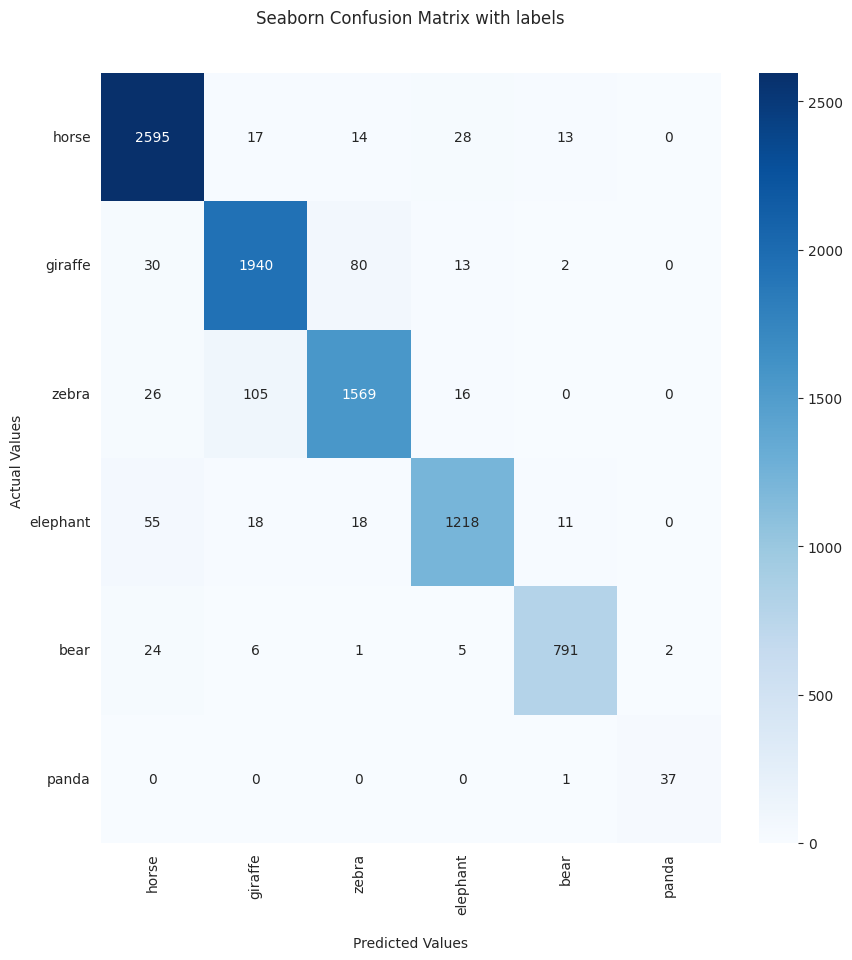

In [27]:
cf_matrix = confusion_matrix(preds['label'].map(automl.reader.class_mapping), OOFs)

plt.figure(figsize = (10, 10))

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt = 'd')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

inverse_class_mapping = {y: x for x,y in automl.reader.class_mapping.items()}
labels = [inverse_class_mapping[i] for i in range(len(inverse_class_mapping))]
ax.xaxis.set_ticklabels(labels, rotation = 90)
ax.yaxis.set_ticklabels(labels, rotation = 0)

plt.show()

In [28]:
%%time

te_pred = automl.predict(submission)
print(f'Prediction for te_data:\n{te_pred}\nShape = {te_pred.shape}')

[19:13:29] Load saved dataset for path
[19:13:29] Feature path transformed
Prediction for te_data:
array([[3.5969845e-03, 1.0720321e-02, 9.7946537e-01, 3.7339814e-03,
        1.8094809e-03, 6.7386829e-04],
       [7.2597130e-03, 2.0958516e-03, 5.6761055e-04, 9.8940259e-01,
        4.0288270e-04, 2.7139822e-04],
       [9.2423020e-04, 9.8299444e-01, 1.5540873e-02, 2.6657403e-04,
        2.2886065e-04, 4.4995515e-05],
       ...,
       [9.9419174e-04, 9.8212898e-01, 1.5786530e-02, 2.7681110e-04,
        6.8190170e-04, 1.3159416e-04],
       [8.7403297e-01, 5.6710720e-02, 2.9600612e-03, 3.1354714e-02,
        3.3111297e-02, 1.8302202e-03],
       [1.7202261e-03, 1.9783929e-02, 9.7088432e-01, 6.0206228e-03,
        1.0517532e-03, 5.3918688e-04]], dtype=float32)
Shape = (388, 6)
CPU times: user 138 ms, sys: 4.56 ms, total: 143 ms
Wall time: 57.9 ms


In [29]:
sub = submission[['image_id']]
for i in range(6):
    sub['pred_' + str(i)] = te_pred.data[:,i]

sub

/tmp/ipykernel_4507/2899387979.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['pred_' + str(i)] = te_pred.data[:,i]


,image_id,pred_0,pred_1,pred_2,pred_3,pred_4,pred_5
0,000000068933.jpg,0.003597,0.010720,0.979465,0.003734,0.001809,0.000674
1,000000170739.jpg,0.007260,0.002096,0.000568,0.989403,0.000403,0.000271
2,000000104619.jpg,0.000924,0.982994,0.015541,0.000267,0.000229,0.000045
3,000000029187.jpg,0.998958,0.000266,0.000309,0.000204,0.000183,0.000081
4,000000132622.jpg,0.012177,0.001665,0.008293,0.002965,0.972606,0.002294
...,...,...,...,...,...,...,...
383,000000529105.jpg,0.665421,0.006047,0.093377,0.022765,0.211565,0.000825
384,000000377486.jpg,0.983069,0.002365,0.001369,0.011767,0.000953,0.000477
385,000000217614.jpg,0.000994,0.982129,0.015787,0.000277,0.000682,0.000132
386,000000226883.jpg,0.874033,0.056711,0.002960,0.031355,0.033111,0.001830


In [30]:
# sub = sub.groupby(['image_id']).mean().reset_index()
# sub

In [31]:
TEs = pd.Series(np.argmax(sub[['pred_' + str(i) for i in range(6)]].values, axis = 1)).map(inverse_class_mapping)
TEs

0         zebra
1      elephant
2       giraffe
3         horse
4          bear
         ...   
383       horse
384       horse
385     giraffe
386       horse
387       zebra
Length: 388, dtype: object

In [32]:
sub['label'] = TEs
sub[['image_id', 'label']].to_csv('LightAutoML_TabularCVAutoML_with_aug.csv', index = False)
sub[['image_id', 'label']]

,image_id,label
0,000000068933.jpg,zebra
1,000000170739.jpg,elephant
2,000000104619.jpg,giraffe
3,000000029187.jpg,horse
4,000000132622.jpg,bear
...,...,...
383,000000529105.jpg,horse
384,000000377486.jpg,horse
385,000000217614.jpg,giraffe
386,000000226883.jpg,horse


In [33]:
te_pred

array([[3.5969845e-03, 1.0720321e-02, 9.7946537e-01, 3.7339814e-03,
        1.8094809e-03, 6.7386829e-04],
       [7.2597130e-03, 2.0958516e-03, 5.6761055e-04, 9.8940259e-01,
        4.0288270e-04, 2.7139822e-04],
       [9.2423020e-04, 9.8299444e-01, 1.5540873e-02, 2.6657403e-04,
        2.2886065e-04, 4.4995515e-05],
       ...,
       [9.9419174e-04, 9.8212898e-01, 1.5786530e-02, 2.7681110e-04,
        6.8190170e-04, 1.3159416e-04],
       [8.7403297e-01, 5.6710720e-02, 2.9600612e-03, 3.1354714e-02,
        3.3111297e-02, 1.8302202e-03],
       [1.7202261e-03, 1.9783929e-02, 9.7088432e-01, 6.0206228e-03,
        1.0517532e-03, 5.3918688e-04]], dtype=float32)

In [34]:
# te_pred__ = np.argmax(te_pred)
# te_pred__

AssertionError: Numpy dataset support only np.ndarray features

In [35]:
from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score

f1_score(TEs, submission['label'], average="weighted")

0.9356831622385448

In [36]:
recall_score(TEs, submission['label'], average="weighted")

0.9355670103092784

In [37]:
precision_score(TEs, submission['label'], average="weighted")

0.9364334868675709

In [38]:
# roc_auc_score(TEs, submission['label'], average="weighted")

ValueError: could not convert string to float: 'zebra'

In [39]:
te_pred.shape

(388, 6)

In [40]:
import joblib
joblib.dump(automl, 'lama_model.joblib')

['lama_model.joblib']

In [ ]:
# automl = TabularCVAutoML(task = task,
#                          timeout=5 * 3600,
#                          autocv_features={"embed_model": 'timm/tf_efficientnetv2_b0.in1k'},
#                         cpu_limit = 2,
#                         reader_params = {'cv': 5, 'random_state': 42})

In [ ]:
# %%time
# 
# oof_pred = automl.fit_predict(train_data, roles = roles, verbose = 3)

In [ ]:
# %%time
# 
# te_pred = automl.predict(submission)
# print(f'Prediction for te_data:\n{te_pred}\nShape = {te_pred.shape}')